### Reload plots for GEM-2 on NC, script on GEM-2_NC branch, and also use saved data from GEM-2_NC branch, but now for validation on Exp-1

In [42]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl; import json
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17;

font = {'family' : 'DejaVu Sans',  'size'   : fs}
mpl.rc('font', **font)

In [44]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"]
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [45]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_NC import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_NC/SimSave/InputData/") 
Exp_no = 1
Temp_Cell_Exp1 = Temp_Cell_Exp_All[Exp_no-1] 
Exp_1_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[Exp_no-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[Exp_no-1],
    Exp_no-1)



Finish reading Experiment!


In [54]:
Exp_no = 5
Temp_Cell_Exp5 = Temp_Cell_Exp_All[Exp_no-1] 
Exp_5_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[Exp_no-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[Exp_no-1],
    Exp_no-1)

Finish reading Experiment!


In [46]:
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_NC/SimSave/P2_R9_Dim/SaveFig") 

In [ ]:
Exp_1_AllData

In [48]:
import pickle
def Read_Model_BestFit(Path_to_Results, purpose_i, Pick, Re_No):
    purpose = f"/{purpose_i}_Case_{Pick}_{Pick}"
    path_i = Path_to_Results + purpose + "/Mats/" + f"{Pick}_Re_{Re_No}-midc_merge.pkl"
    #print(path_i)
    with open(path_i, 'rb') as file:
        data = pickle.load(file)
    return data

""" with open('bayes_opt_state.pkl', 'rb') as f:
    optimizer = pickle.load(f) """

BasicPath = os.path.expanduser(
    "~/EnvPBGEM_NC/SimSave/P2_R9_Dim/Run_On_NewBranch_NC_2/") 
purpose_i = "SEI_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"

SEI_Exp1_GoodFit = {}
SEI_Exp1_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)

In [56]:
# read modelling results for exp-5
SEI_Exp5_GoodFit = {}; purpose_i = "SEI_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"
SEI_Exp5_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)
SEIDry_Exp5_GoodFit = {}; purpose_i = "SEI_Dry_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"
SEIDry_Exp5_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)
Full_Exp5_GoodFit = {}; purpose_i = "Full_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"
Full_Exp5_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)

In [49]:
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_NC/SimSave/P2_R9_Dim/Run_On_NewBranch_NC_2/") 
purpose_i = "SEI_Dry_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"

SEIDry_Exp1_GoodFit = {}
SEIDry_Exp1_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)

In [50]:
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_NC/SimSave/P2_R9_Dim/Run_On_NewBranch_NC_2/") 
purpose_i = "Full_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"

Full_Exp1_GoodFit = {}
Full_Exp1_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)

In [51]:
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_NC/SimSave/P2_R9_Dim/SaveFig")
Target = "R_240821_Exp1_5"
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

In [52]:
Default_Colors_Alpha = [
    [31/255, 119/255, 180/255, 0.9], # like blue
    [44/255, 160/255, 44/255,  0.9], # like green  
    [214/255, 39/255, 40/255,  0.9], # like red
    [255/255, 127/255, 14/255, 0.9],]# like orange 
ps_num = 40; index_exp=1;  T_deg = 25; dpi = 300; 

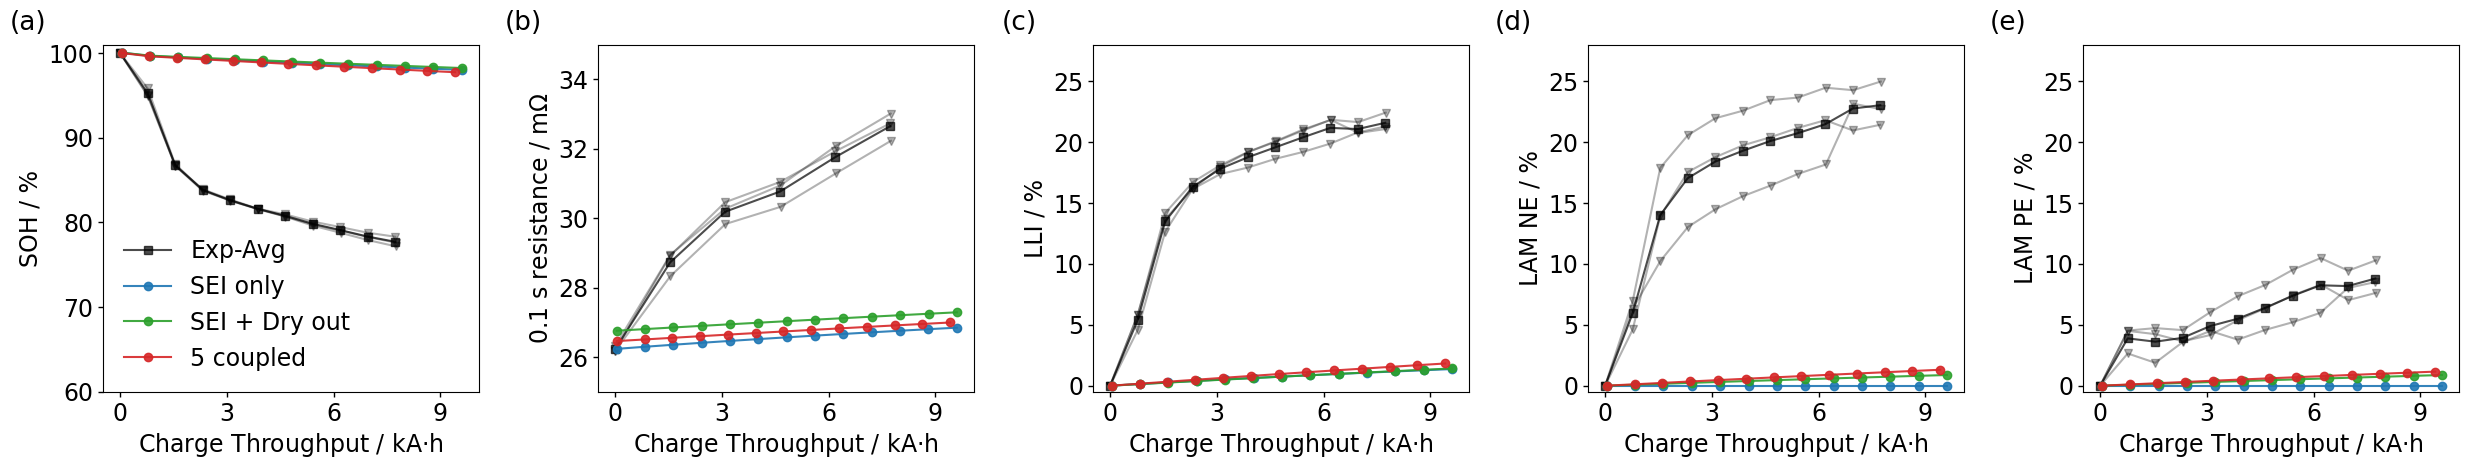

In [62]:
# Fig. 3 -  Validate SOH and Lump resistance for 3 Ts and 3 models
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
Exp_Any_AllData = Exp_1_AllData; 
index_exp = 1
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
Cases = [SEI_Exp1_GoodFit,SEIDry_Exp1_GoodFit,Full_Exp1_GoodFit]; 

fig, axs = plt.subplots(1,5, figsize=(25,5),tight_layout=True) 
j=0
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[j].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend SOH [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j].set_ylim(60,101)
    axs[j].set_xticks([0,3,6,9])
    #axs[j].set_yticks([88,92,96,100])
    
axs[0].set_ylabel("SOH / %")


j = 1
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[j].plot(
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    axs[j].plot(
        X_5_st,Y_5_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["Res_midSOC"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    
    axs[j].set_ylim(25,35)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel(r"0.1 s resistance / m$\Omega$")

j=2
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[j].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend LLI [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LLI / %")

j = 3
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp, np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp)
    axs[j].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_ne [%]"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LAM NE / %")

j = 4
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp, np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp)
    axs[j].plot(
        X_1_st,Y_4_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_pe [%]"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LAM PE / %")

ABC_labels = [f"({chr(97 + i)})" for i in range(5)]
for k in range(5):
    axs[k].set_xlabel(r"Charge Throughput / kA$\cdot$h")
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
    axs[k].text(
        -0.15, 1.1, 
        ABC_labels[k], transform=axs[k].transAxes, 
        fontsize=fs+2,  # fontweight='bold', 
        va='top', ha='right')
axs[0].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)

plt.savefig(
    target_folder + f"/Exp-1 Fit 5 indices.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Exp-1 Fit 5 indices.svg") 

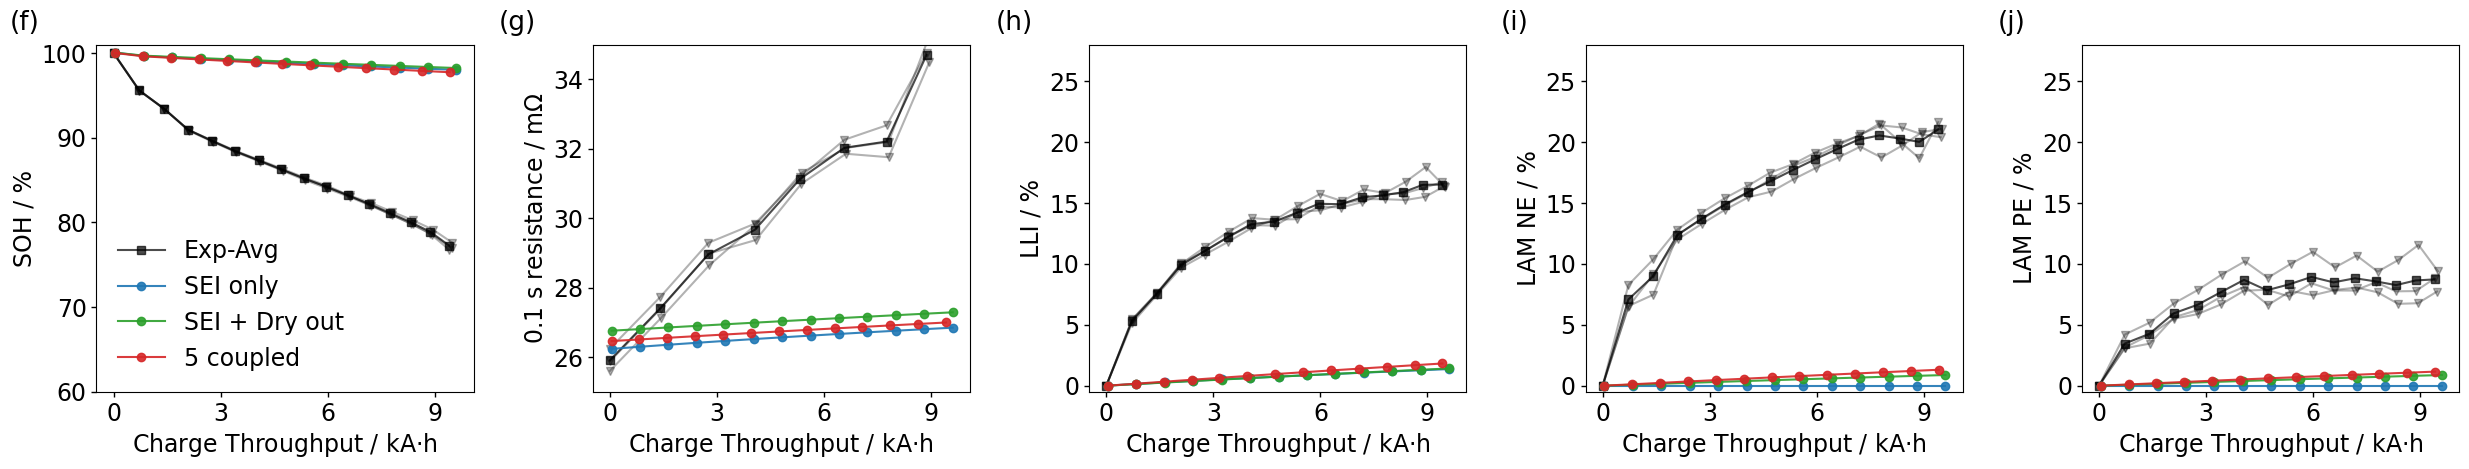

In [63]:
# for exp-5
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
Exp_Any_AllData = Exp_5_AllData; 
index_exp = 5
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
Cases = [SEI_Exp1_GoodFit,SEIDry_Exp1_GoodFit,Full_Exp1_GoodFit]; 

fig, axs = plt.subplots(1,5, figsize=(25,5),tight_layout=True) 
j=0
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[j].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend SOH [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j].set_ylim(60,101)
    axs[j].set_xticks([0,3,6,9])
    #axs[j].set_yticks([88,92,96,100])
    
axs[0].set_ylabel("SOH / %")


j = 1
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[j].plot(
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    axs[j].plot(
        X_5_st,Y_5_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["Res_midSOC"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    
    axs[j].set_ylim(25,35)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel(r"0.1 s resistance / m$\Omega$")

j=2
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[j].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend LLI [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LLI / %")

j = 3
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp, np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp)
    axs[j].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_ne [%]"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LAM NE / %")

j = 4
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp, np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp)
    axs[j].plot(
        X_1_st,Y_4_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_pe [%]"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LAM PE / %")

ABC_labels = [f"({chr(97+5 + i)})" for i in range(5)]
for k in range(5):
    axs[k].set_xlabel(r"Charge Throughput / kA$\cdot$h")
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
    axs[k].text(
        -0.15, 1.1, 
        ABC_labels[k], transform=axs[k].transAxes, 
        fontsize=fs+2,  # fontweight='bold', 
        va='top', ha='right')
axs[0].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)

plt.savefig(
    target_folder + f"/Exp-5 Fit 5 indices.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Exp-5 Fit 5 indices.svg")